# **Image Classification [Part 2]**
---

**Required Reading**

- [Ian Goodfellow's Deep Learning - Chapter 1, Section 6.2, and Section 8.1](https://www.deeplearningbook.org/contents/intro.html)
- [AlexNet Paper](https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf)

**Additional Reading/Viewing**

[Outstanding YouTube Series from 3 Blue 1 Brown](https://www.youtube.com/watch?v=aircAruvnKk)

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:

````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

## 1. Convolutional Neural Networks
---

- Last time, in Image Classification Part 1, we left off wondering how Yann LeCun beat our 5 layer deep network way back in 1998. 
- Here's a clip of Yann in 1993 at AT&T Bell Labs demonstrating LeNet-1, a precursor to his 1998 network.

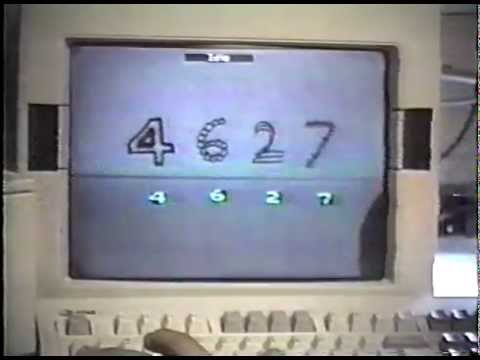

In [1]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('FwFduRA_L6Q', width = 960, height = 540)

- Yann LeCun joined AT&T Bell Labs in 1988 after leaving a postdoc position on Geoff Hinton's lab at the University of Toronto. 
- LeCun's research focused on optical charecter recognition (OCR), and developed a system that was used to read 10% of all the checks in the US in the late 1990s and early 2000s. [Source](https://en.wikipedia.org/wiki/Yann_LeCun).
- His collaborators at AT&T included Leon Bottou and [Vladimir Vapnik](https://en.wikipedia.org/wiki/Vladimir_Vapnik).
- In 2013, Yann became the director of Facebook AI Research (FAIR). 

### **So how did Yann Lecun beat our 5-layer deep network way back in 1998?**


- The key difference between Yann's network and ours is an idea that Yann called **weight sharing** in his [1989 Publication on Handwritten Zip Code Recognition](http://yann.lecun.com/exdb/publis/pdf/lecun-89e.pdf).

![](../graphics/birth_of_modern_cnn-01.png)

- Today we call Yann's idea a Convolutional Neural Network (CNN). 
- [Goodfellow](https://www.deeplearningbook.org/contents/convnets.html) gives a nice CNN definition: 
*"Convolutional networks are simply neural networks that use convolution in place of general matrix multiplication in at least one of their layers."*

### **They Should Really Be Called "Cross Correlation Neural Networks"**

![](../graphics/filter_animation.gif)

- The convolution operation is used in many areas of mathematics and engineering, we can express 2d convolution like this:
$$
S(i, j) = \sum_m \sum_n I(i-m, j-n)K(m, n)
$$
- Where $I$ is our input image, $K$ is kernel and S is our output. 
- Subtracting $m$ and $n$ from $i$ and $j$ has the effect of flipping our kernel $K$ makes convolution commutative. However, in Convolutional Neural Networks, we don't really care about the commutative property, and many libraries, including tensorflow implement the **cross-correlation** function instead of **convolution**:

$$
S(i, j) = \sum_m \sum_n I(i+m, j+n)K(m, n)
$$

![](../graphics/spacer_small.png)

### 1.1 CNN Walkthrough
---

- Let's walkthrough how CNNs process input images. 
- We'll borrow some slides from [Stanford's CS 231n: Convolutional Neural Networks for Visual Recognition](https://www.youtube.com/watch?v=LxfUGhug-iQ&list=PLkt2uSq6rBVctENoVBg1TpCC7OQi31AlC&index=7).
- A nice way to think about the convolutional operations we apply in neural networks is **operations on volumes**, as opposed to the operations on vectors we saw with regular neural networks:


In [2]:
from IPython.display import Image, display
from ipywidgets import interact

def slide_show(slide_num=1):     
    display(Image('../graphics/cs_231n_cnn_slides/cs_231n_' + str(slide_num) + '.png'))

In [3]:
interact(slide_show, slide_num = (1, 5));

interactive(children=(IntSlider(value=1, description='slide_num', max=5, min=1), Output()), _dom_classes=('wid…

![](../graphics/spacer_small.png)

### 1.2 Padding + Strides
---

- As you can imagine, there are many variants of convolution used in CNNs, there's a [really great paper on this](https://arxiv.org/pdf/1603.07285.pdf). 
- Changing our padding or strides will change the size of our data as it flows through our network. 

<table style="width:100%; table-layout:fixed;">
  <tr>
    <td><img width="150px" src="../graphics/conv_animations/no_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/arbitrary_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/same_padding_no_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/full_padding_no_strides.gif"></td>
  </tr>
  <tr>
    <td>No padding, no strides</td>
    <td>Arbitrary padding, no strides</td>
    <td>Half padding, no strides</td>
    <td>Full padding, no strides</td>
  </tr>
  <tr>
    <td><img width="150px" src="../graphics/conv_animations/no_padding_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/padding_strides.gif"></td>
    <td><img width="150px" src="../graphics/conv_animations/padding_strides_odd.gif"></td>
    <td></td>
  </tr>
  <tr>
    <td>No padding, strides</td>
    <td>Padding, strides</td>
    <td>Padding, strides (odd)</td>
    <td></td>
  </tr>
</table>

![](../graphics/spacer_small.png)

### 1.3 How is LeNet-5 so good?
---

- As nicely stated the exceprt from Yann Lecun's 1989 paper above, CNNs "allow us to express information about the geometry and topology of the task". The arrangement of the pixels in our images is not arbitrary, and we know the lots of information can be gleaned by looking at local neighborhoods of our images (such as edge detection) - CNNs are a good for this. 
- Aside from taking advantage of the topology of images, CNNs are also **incredibly efficient**. 
- Let's have a look at LeCun's 1998 convolutional neueral network, LeNet-5, that achieves a 99.05 accuracy on mnist.

![](../graphics/question_two-01.png)

---

![](../graphics/question_three-01.png)

- So, the first layer of LeNet-5 has way less parameters than our 7 layer fully connected layers. 
- **Why might this be advantageous?**

![](../graphics/spacer_small.png)

### 1.4 Pooling
---

- Let's look at one more interesting idea from LeNet-5. After each convolutional layer, Yann includes a "subsampling" layer. Today we call this a **pooling** layer. 

![](../graphics/lenet_5_screenshot.png)

- Notice that after each of Yann's pooling layers, our feature maps decrease in size by a factor of 2. 

 ![](../graphics/pooling-01.png)

- Pooling makes our networks **approximately invariant** to translations in our input. 
- This can be advantageous in problems like image classification, where the exactly location of features is less important than their general location. 
- Pooling also reduces the size of our data at it flows through our network, allowing us to effectively make our networks smaller and more efficient.

### 1.5 Let's Train LeNet-5!
---

- We'll implement a modern version of LeNet-5, with a few changes from Yann's original implementation:
    - Activation functions immediately follow conv layers, not pooling layers. 
    - Our pooling layers don't have learnable parameters, unlike LeCun's sub-sampling layers 
    - We'll using a cross entropy cost function, LeNet used radial basis functions 
    - We'll using the Adam optimizer, LeCun used gradient descent with a variable learning rate.

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F

- We'll borrow this method from Jeremy Howard's great [neural network tutorial](https://pytorch.org/tutorials/beginner/nn_tutorial.html), that will allow us to use view to rehshape our tensor after our convolutional layers.
- Apparently doing this is a bit contreversial, the PyTorch authors would prefer you create your models using classes, as we saw in our introduction_to_pytorch notebook, where the fastai preferece is to use nn.Sequential to create models. 

In [5]:
class Lambda(nn.Module):
    def __init__(self, func):
        super().__init__()
        self.func = func

    def forward(self, x):
        return self.func(x)

![](../graphics/lenet_5_screenshot.png)

In [6]:
# Modern Version of LeNet-5 in Pytorch
model = nn.Sequential(nn.Conv2d(1, 6, kernel_size = 5), nn.Tanh(), 
                     nn.AvgPool2d(2), 
                     nn.Conv2d(6, 16 , kernel_size = 5), nn.Tanh(), 
                     nn.AvgPool2d(2), 
                     Lambda(lambda x: x.view(x.size(0),-1)), 
                     nn.Linear(256, 120), nn.Tanh(),
                     nn.Linear(120, 84), nn.Tanh(),
                     nn.Linear(84, 10))

- A really valuable/important step is comparing this pytorch code line by line with the architecture we're implementing. 

In [7]:
from torch.utils.data import DataLoader, TensorDataset
from torch import optim

In [8]:
import numpy as np
from pathlib import Path
from matplotlib.pyplot import *
import pickle, gzip
from tqdm import tqdm

DATA_PATH = Path("../data")
PATH = DATA_PATH / "mnist"
FILENAME = "mnist.pkl.gz"

with gzip.open((PATH / FILENAME).as_posix(), "rb") as f:
        ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding="latin-1")

- To use `Conv2d` in Pytorch, we need to reshape our data into tensors of shape (batch_size, color_channels, image_height, image_width).

In [9]:
x_train = x_train.reshape(-1, 1, 28, 28)
x_valid = x_valid.reshape(-1, 1, 28, 28)

In [10]:
x_train.shape

(50000, 1, 28, 28)

Text(0.5, 1.0, '9')

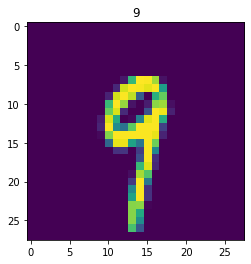

In [11]:
#Double check tha tour reshape is doing what we think it is!
imshow(x_train[600, 0, :, :])
title(y_train[600])

In [12]:
#Create dataloaders
train_ds = TensorDataset(torch.tensor(x_train, dtype = torch.float), torch.tensor(y_train, dtype = torch.long))
train_dl = DataLoader(train_ds, batch_size=64, shuffle = True, num_workers = 4, drop_last = True)

valid_ds = TensorDataset(torch.tensor(x_valid, dtype = torch.float), torch.tensor(y_valid, dtype = torch.long))
valid_dl = DataLoader(valid_ds, batch_size=256, shuffle = True, num_workers = 4, drop_last = True)

In [13]:
x, y = next(iter(train_dl))
for i in range(1, len(model)):
    a = model[:i](x)
    print(model[i], a.shape)

Tanh() torch.Size([64, 6, 24, 24])
AvgPool2d(kernel_size=2, stride=2, padding=0) torch.Size([64, 6, 24, 24])
Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1)) torch.Size([64, 6, 12, 12])
Tanh() torch.Size([64, 16, 8, 8])
AvgPool2d(kernel_size=2, stride=2, padding=0) torch.Size([64, 16, 8, 8])
Lambda() torch.Size([64, 16, 4, 4])
Linear(in_features=256, out_features=120, bias=True) torch.Size([64, 256])
Tanh() torch.Size([64, 120])
Linear(in_features=120, out_features=84, bias=True) torch.Size([64, 120])
Tanh() torch.Size([64, 84])
Linear(in_features=84, out_features=10, bias=True) torch.Size([64, 84])


In [14]:
num_epochs = 15; lr = 1e-1; accuracies_cross_entropy = [] #We can use a higher learning rate with cross entroy loss. 

opt = optim.SGD(model.parameters(), lr=lr)
for i in range(num_epochs):
    for x, y in train_dl:
        yhat = model(x)
        loss = F.cross_entropy(yhat, y) #Takes care of softmax and one hot encoding for us!
        loss.backward() 
        opt.step(); opt.zero_grad();
    
    #Check validation loss and accuracy at the end of each epoch:
    model.eval() #Put in evaluation mode!
    with torch.no_grad():
        x, y = next(iter(valid_dl)) #Just measure on one minibatch
        yhat = model(x)
        max_values, max_indices = torch.max(yhat, dim=1)
        accuracy = (max_indices.eq(y).sum().float()/len(y)).item()
        accuracies_cross_entropy.append(accuracy)
        print('Epoch: ' + str(i+1) + ', training loss = ' + str(round(loss.item(), 3)) + \
              ', valid accuracy = ' + str(round(accuracy, 3)))

Epoch: 1, training loss = 0.203, valid accuracy = 0.953
Epoch: 2, training loss = 0.143, valid accuracy = 0.973
Epoch: 3, training loss = 0.114, valid accuracy = 0.973
Epoch: 4, training loss = 0.045, valid accuracy = 0.988
Epoch: 5, training loss = 0.049, valid accuracy = 0.973
Epoch: 6, training loss = 0.039, valid accuracy = 0.992
Epoch: 7, training loss = 0.009, valid accuracy = 0.965
Epoch: 8, training loss = 0.093, valid accuracy = 0.977
Epoch: 9, training loss = 0.024, valid accuracy = 0.98
Epoch: 10, training loss = 0.051, valid accuracy = 0.977
Epoch: 11, training loss = 0.036, valid accuracy = 0.988
Epoch: 12, training loss = 0.002, valid accuracy = 0.992
Epoch: 13, training loss = 0.075, valid accuracy = 0.984
Epoch: 14, training loss = 0.017, valid accuracy = 0.996
Epoch: 15, training loss = 0.004, valid accuracy = 0.977


In [15]:
#Measure Accuracy on complete validation set for better accuracy estimate:
x = torch.tensor(x_valid, dtype = torch.float)
y = torch.tensor(y_valid, dtype = torch.long)
yhat = model(x)
max_values, max_indices = torch.max(yhat, dim=1)
accuracy = (max_indices.eq(y).sum().float()/len(y)).item()
accuracy

0.9876000285148621

- We've acheived a ~99% test set accuracy with our LeNet-5 implementation!
- We did this be leveraging something we knew about images: **That the relative location of our pixels mater**, and that we can achieve very good performance by sliding the same convolutional kernel across our whole image. 
- If you're interested in the specific filters that LeNet-5 learns, Yann has some nice [visualizations](http://yann.lecun.com/exdb/lenet/index.html) of LeNet-5 in action on this website. 

### 1.6 Why Didn't Deep Learning Take Off in the Early 2000s?
---

- As we'll see, Yann's deep neural network architecture, LeNet-5 is remarkably similar to the models we use today. 
- However, as you may know, **deep learning** didn't really take off until ~2012. 
- What took so long? 
- How are modern deep learning models different than LeNet-5?
- In the next section, we'll discuss a bit of history, and then try to answer these questions. 

![](../graphics/spacer_small.png)

## 2. ImageNet and AlexNet
---

![](../graphics/fei_fei_li-01.png)

- Beginning around 2006, Fei Fei Li, then a new professor at the University of Illinois Urbana-Champaign, began working on building the largest labeled image dataset ever constructed. [Great Article on Fei Fei Li and ImageNet](https://qz.com/1034972/the-data-that-changed-the-direction-of-ai-research-and-possibly-the-world/).
- She chose to use the [WordNet lexical database](https://en.wikipedia.org/wiki/WordNet) for her class labels, and to focus on finding images for each "synset" in Wordnet. 
- Li first tried hiring undergraduate students to perform annotation, but quickly found that this appraoch simple would not achieve the scale she needed, and instead used Amazon Mechanical Turk. 
- ImageNet was first published in 2009, and quickly developed into a public computer vision competition, the ImageNet Large Scale Visual Recognition Competition (ILSVRC). 
- ILSVRC used a subset of 1000 imaget classes, and included ~1.2M training images. 

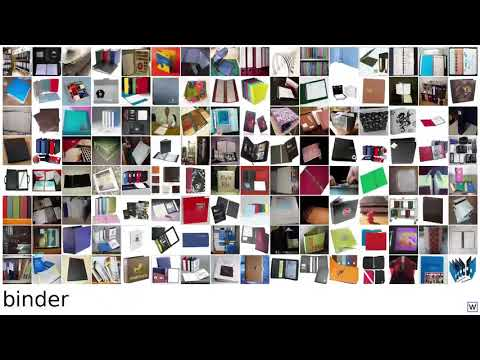

In [97]:
from IPython.display import YouTubeVideo
YouTubeVideo('WO_mP-HPH4M', width = 1280, height=720)

- So, perhaps not surprisingly, ILSVRC turned out to be quite difficult. 
- The best performance achieved in 2010 was a top-5 test set error rate of **28.2%**. Top-5 means that the correct answer was one of the top five answers given by the network. 
- In 2011, the top-5 error rate dropped to **25.8%**, [achieved by a team from Xerox](http://image-net.org/challenges/LSVRC/2011/results) using SIFT and Fisher Vectors (FVs).
- And then...this happened:

### 2.1 Hinton et al Make Neural Networks Sexy Again...Again
---

![](../graphics/hinton_krizhevinsky-01.png)

- SuperVision, a team from the University of Toronto, led by Geoff Hinton (Remember Him?) **reduced the top-5 test set error by around 40%, down to 15.4%.**
- The model they used is today often called "AlexNet" after Alex Krizhevsky
- So, how did Hinton's team acheive such a huge increase in performance? What type of magic was afoot? 
- Let's have a closer look at the [AlexNet Paper](http://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf).
- Hinton's team used a deep neural network, not all that different from LeNet-5:

![](../graphics/alexnet_paper_screenshots/architecture.png)

- This figure drives be crazy becuase the top part is cropped off in the original paper, one of these days I'm going to make a non-cropped version. 
- There's also apparently an error in the paper - the input image size should be 227x227. 
- Let's take some time to talk throught the **Alexnet** architecture. 
- First, this figure shows 2 copies of most layers - **why?**
- Next, why is our output of dimenion 1000? 

![](../graphics/spacer_small.png)

### 2.2 Pretrained Alexnet in Pytorch
---

- Alright, let's walk through AlexNet in detail.
- We'll use a simplified AlexNet, where we merge Alex's two GPU pipelines into one.
- We can grab a pretrained version of Alexnet using [torchvision](https://pytorch.org/docs/stable/torchvision/index.html).

In [5]:
import numpy as np
from matplotlib.pyplot import *

In [6]:
import torch
import torch.nn as nn
import torchvision.models as models
alexnet = models.alexnet(pretrained = True)

Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /Users/stephenwelch/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth
100%|██████████| 244418560/244418560 [00:04<00:00, 51649805.63it/s]


In [7]:
alexnet.eval() #Put Model into evaluation mode

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

- To get a feeling for what exactly alexnet if doing, let's walkthrough the network step by step. 
- There's a couple new concepts here, ReLU activation functions and Dropout, we'll discuss these as we get to them. 
- Let's grab an example image to pass through our network.
- We'll use the Python Image Library (PIL) to import our image, PIL offers some nice compatabilities with pytorch and fastai.

In [8]:
from PIL import Image
im = Image.open('../data_sample/golf_ball.JPEG')

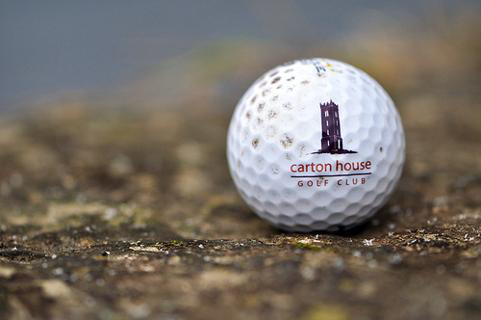

In [9]:
im

- To actually pass our image into our network, we need to do a little preprocessing, including converting it into a pytorch tensor.

In [10]:
from torchvision import transforms
tfms = transforms.Compose([transforms.Resize((224, 224)), #Resize to standard alexnet size
                                transforms.ToTensor(), #Convert to tensor
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], #Normalize using imagenet stats 
                                                     std=[0.229, 0.224, 0.225])]) 

In [11]:
im_tensor = tfms(im)

In [12]:
im_tensor.shape #Notice that our color channels are now first:

torch.Size([3, 224, 224])

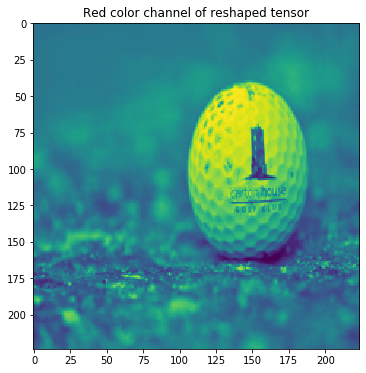

In [13]:
#Quick visualization to see what we've got!
fig = figure(0, (6,6))
imshow(im_tensor.numpy()[0,:,:])
title('Red color channel of reshaped tensor');

- Before processing our image, we have to make one more minor adjustment. 
- Our network expects a minibatch of images of dimension (batch_size, color_channels, height, width). 
- Since we only have one image, we need to expand the dimension of our tensor from 3 to 4. 
- We can use this little trick:

In [14]:
im_tensor.shape, im_tensor[None].shape

(torch.Size([3, 224, 224]), torch.Size([1, 3, 224, 224]))

In [15]:
#We can finally pass our image into alexnet!
with torch.no_grad():
    yhat = alexnet(im_tensor[None])

In [16]:
yhat.shape

torch.Size([1, 1000])

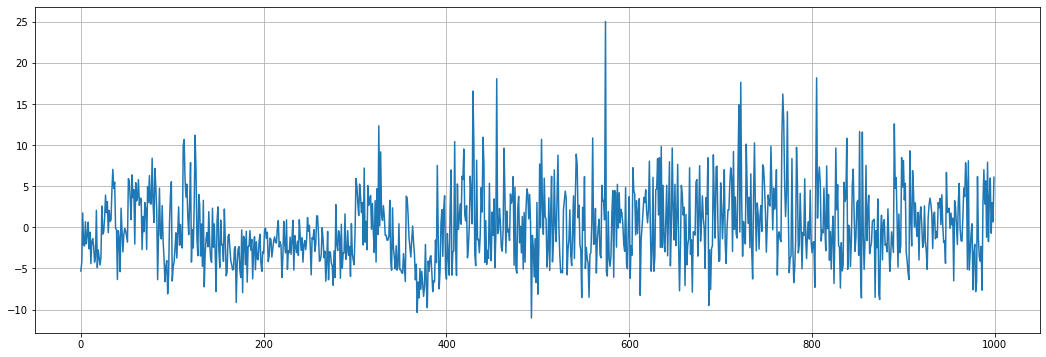

In [17]:
fig = figure(0, (18, 6))
plot(yhat.detach().numpy().ravel())
grid(1)

- Why is the dimension of our alexnet output (1, 1000)?
- What do these numbers **mean**?

![](../graphics/spacer_small.png)

![](../graphics/spacer_small.png)

- As you may have guessed, we have one prediction for each of the imagenet (ILSVRC 2012) class. 
- Now, let's look at the scale of our prediction values - they range from -10 to around 25 - why is this?
- As we discussed in image classification part 1, classification models like alexnet are generally trained using a softmax output layer and a cross-entropy loss function. 
- The softmax function is generally part of the loss function, we can see that it hasn't been included in our pretrained alexnet. 
- If we add back in the softmax function, our outputs will be a bit easier to understand
- Further, we can (under certain assumptions) interpret the softmax outputs as the models probability of a certian label, given the image.  

In [18]:
yhat_softmax = nn.Softmax(dim =1)(yhat)

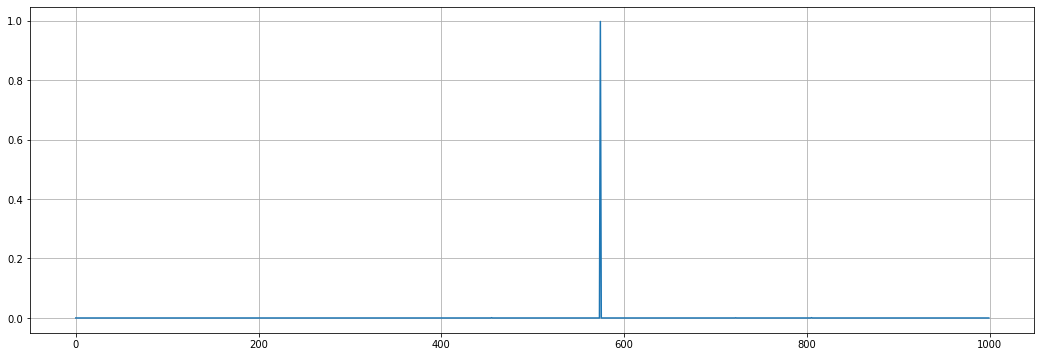

In [19]:
fig = figure(0, (18, 6))
plot(yhat_softmax.detach().numpy().ravel())
grid(1)

- That makes more sense! As you can see, after applying our softmax, our model is stronly predicting one class over the rest. 
- Let's see which class it is!

In [20]:
torch.argmax(yhat)

tensor(574)

In [21]:
#To figure out which label our class index corresponds to, we need an imagenet index to label conversion:
with open("../data_sample/imagenet_labels.txt") as f:
    idx2label = eval(f.read())

In [22]:
idx2label[torch.argmax(yhat).item()]

'golf ball'

- Alright, so as you can see, our pretrained alexnet model is making a pretty reasonable prediction!
- Now, in the interesting of really understanding what's going on, let's spend a little time walkthrough our alexnet model. 

### 2.3 Alexnet "Conv 1"
---

In [23]:
alexnet

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace)
    (3): Dropout(p

- Our model is divided into 3 sections: features, avgpool, and classifier. 
- We can directly access a given layer like this:

In [24]:
alexnet.features[0]

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

- This is our first convolutional layer. As we can see, it's using a kernel size of (11x11). 
- Why is our number of input filters 3?
- Let's have a look at our actual weight values. 

In [25]:
w = alexnet.features[0].weight
w.shape

torch.Size([64, 3, 11, 11])

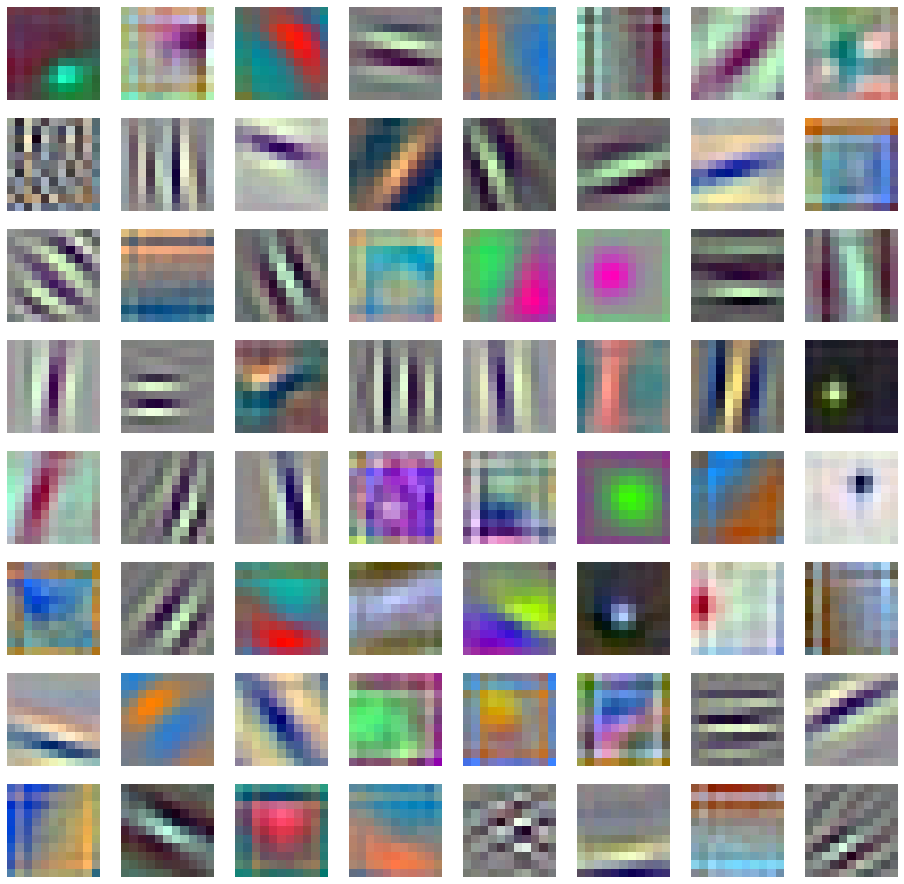

In [26]:
fig = figure(0, (16, 16))
for i in range(w.shape[0]):
    fig.add_subplot(8, 8, i+1)
    filt = np.moveaxis(w[i].detach().numpy().copy(), (0, 1, 2), (2, 0, 1))
    filt -= filt.min(); filt /= filt.max(); #Rescale between 0 and 1 for imshow
    imshow(filt); axis('off')

- As you can see, our alexnet model learned some really interesting filter structures from training on imagenet!
- What types of patterns would these filters respond to?
- Some of these should remind you of the edge detectors we say earlier in the course!
- We also see what appear to be "blob detectors" and maybe "texture detectors".
- Can you believe this shit actually works!?
- Now let's see what actually happens to our image in this first convolutional layer!

In [27]:
alexnet.features[0]

Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))

In [28]:
with torch.no_grad():
    activations = alexnet.features[0](im_tensor[None]) #Pass image through first layer
activations.shape

torch.Size([1, 64, 55, 55])

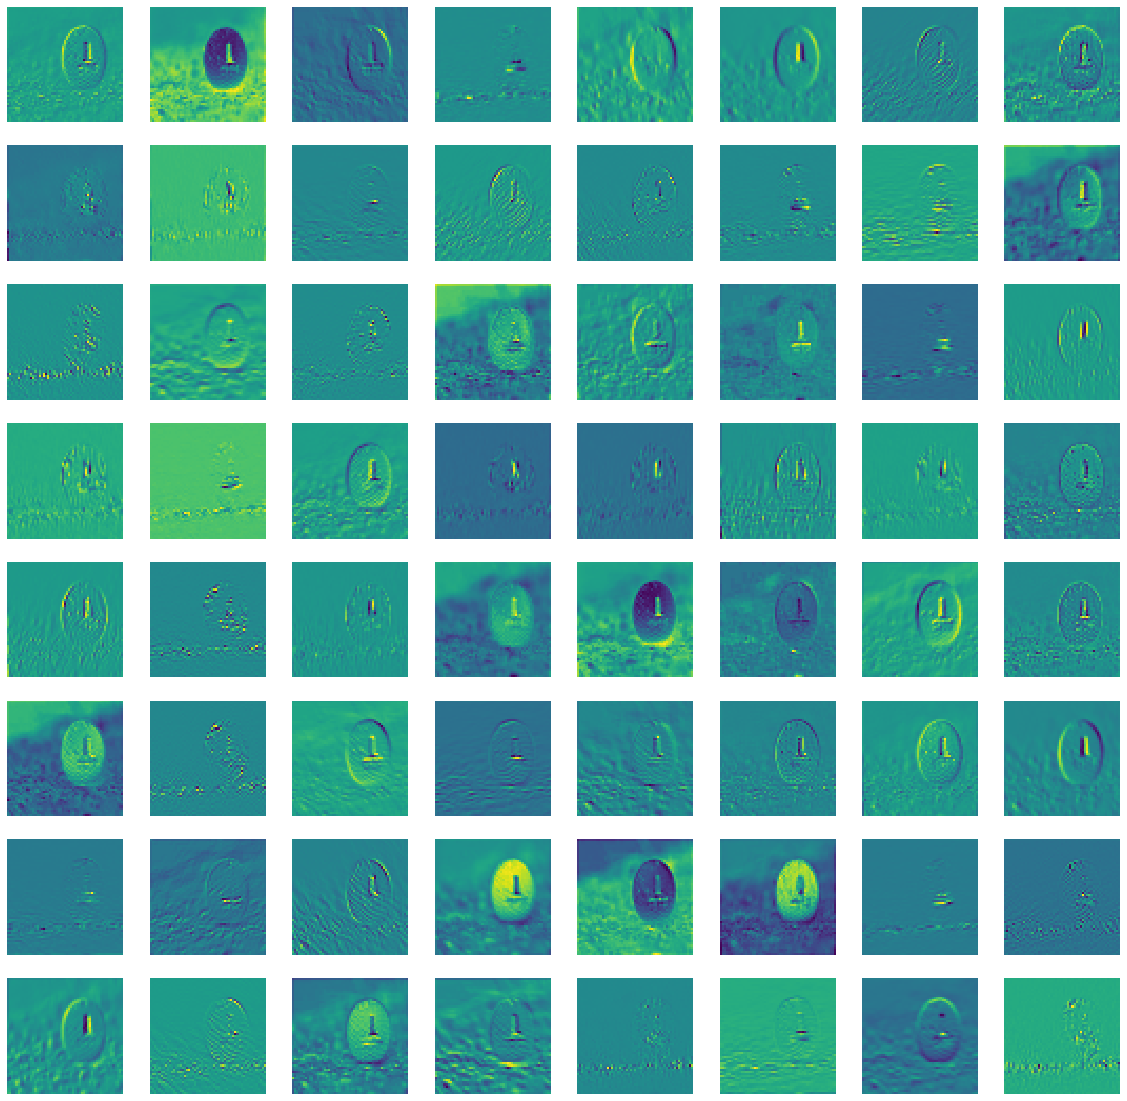

In [29]:
fig = figure(0, (20, 20))
for i in range(64): #activations.shape[1]):
    fig.add_subplot(8, 8, i+1)
    feature_map = activations[0, i, :, :].detach().numpy()
    imshow(feature_map); axis('off');

- These are the 64 channels our image is processed "into" in our first convoluational layer. 
- Notice that our filters are responding to different parts of the images. 
- There's a [really cool tool](https://www.youtube.com/watch?time_continue=31&v=AgkfIQ4IGaM) from Yosinski et al. for visualizing these activations through alexnet.

### 2.3 ReLU
---

- Ok, so we now hopefully have some sense for what our first convolutaional layer has learned to do.
- The AlexNet team used an activation function that had not been widely used in neural networks before - Rectified Linear Units (ReLU). 

In [30]:
alexnet.features[:3]

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

![](../graphics/relu_activations-01.png)

- From [Goodfellow section 6.3.1](https://www.deeplearningbook.org/contents/mlp.html): 

>"These units are easy to optimize because they are so similar to linear units. The only diﬀerence between a linear unit and a rectiﬁed linear unit is that a rectiﬁed linear unit outputs zero across half its domain. This makes the derivatives through a rectiﬁed linear unit remain large whenever the unit is active. The gradients are not only large but also consistent. The second derivative of the rectifying operation is 0 almost everywhere, and the derivative of the rectifying operation is 1 everywhere that the unit is active."

- Let's have a look at what our artivation funciton does to our data as it moves through our network.

In [31]:
with torch.no_grad():
    activations_1 = alexnet.features[0](im_tensor[None]) #Pass image through first layer
    activations_2 = alexnet.features[:2](im_tensor[None]) #Pass image through first two layers

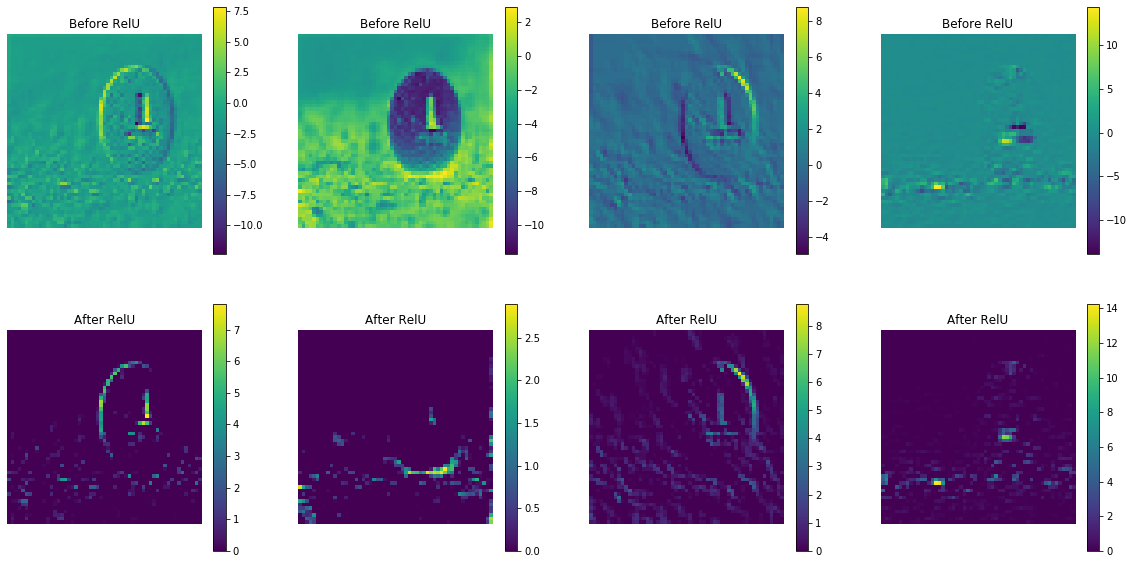

In [32]:
fig = figure(0, (20, 10))
for i in range(4): #activations.shape[1]):
    fig.add_subplot(2, 4, i+1)
    feature_map = activations_1[0, i, :, :].detach().numpy()
    imshow(feature_map); axis('off'); colorbar(); title('Before RelU')

    fig.add_subplot(2, 4, 4+i+1)
    feature_map = activations_2[0, i, :, :].detach().numpy()
    imshow(feature_map); axis('off'); colorbar(); title('After RelU')

- As you can see, ReLU "clips" everything below zero to zero, and leaves the positive numbers alone. 

### 2.4 More Convs and ReLUs
---

- One remarkable feature of deep learning is how consistent the operations are as we move through the network. 
- As you can see, we follow a very similar pattern of convolutional layers followed by activation layers as we move through the network.
- More modern architectures like ResNet are even more consistent from layer to layer!

In [33]:
alexnet.features

Sequential(
  (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
  (1): ReLU(inplace)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (4): ReLU(inplace)
  (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (7): ReLU(inplace)
  (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (9): ReLU(inplace)
  (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace)
  (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
)

- Let's have a look at the output after 2 convolutions and 2 max pools:

In [34]:
with torch.no_grad():
    activations = alexnet.features[:6](im_tensor[None]) #Pass image through first layer
activations.shape

torch.Size([1, 192, 13, 13])

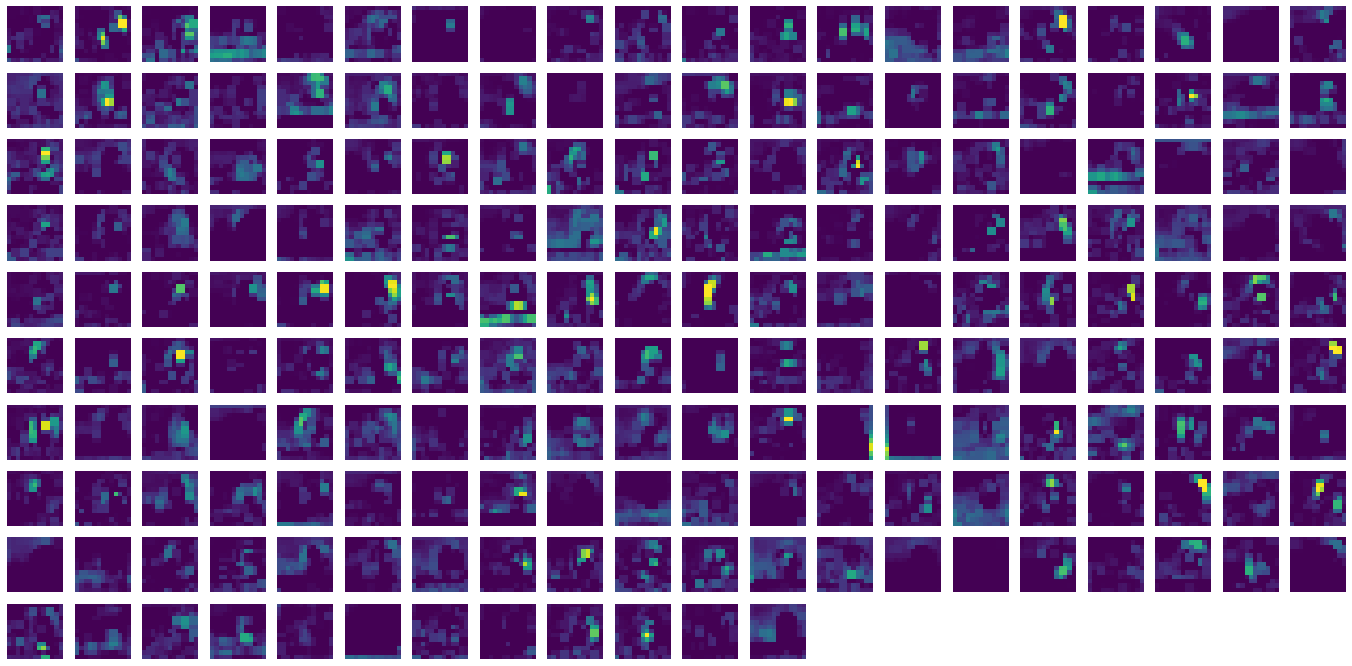

In [35]:
fig = figure(0, (24, 12))
for i in range(192): #activations.shape[1]):
    fig.add_subplot(10, 20, i+1)
    feature_map = activations[0, i, :, :].detach().numpy()
    #print(feature_map.min(), feature_map.max())
    imshow(feature_map, vmin = 0, vmax = 20); axis('off');

- Now after 4 convolutions:

In [36]:
with torch.no_grad():
    activations = alexnet.features[:10](im_tensor[None]) #Pass image through first layer
activations.shape

torch.Size([1, 256, 13, 13])

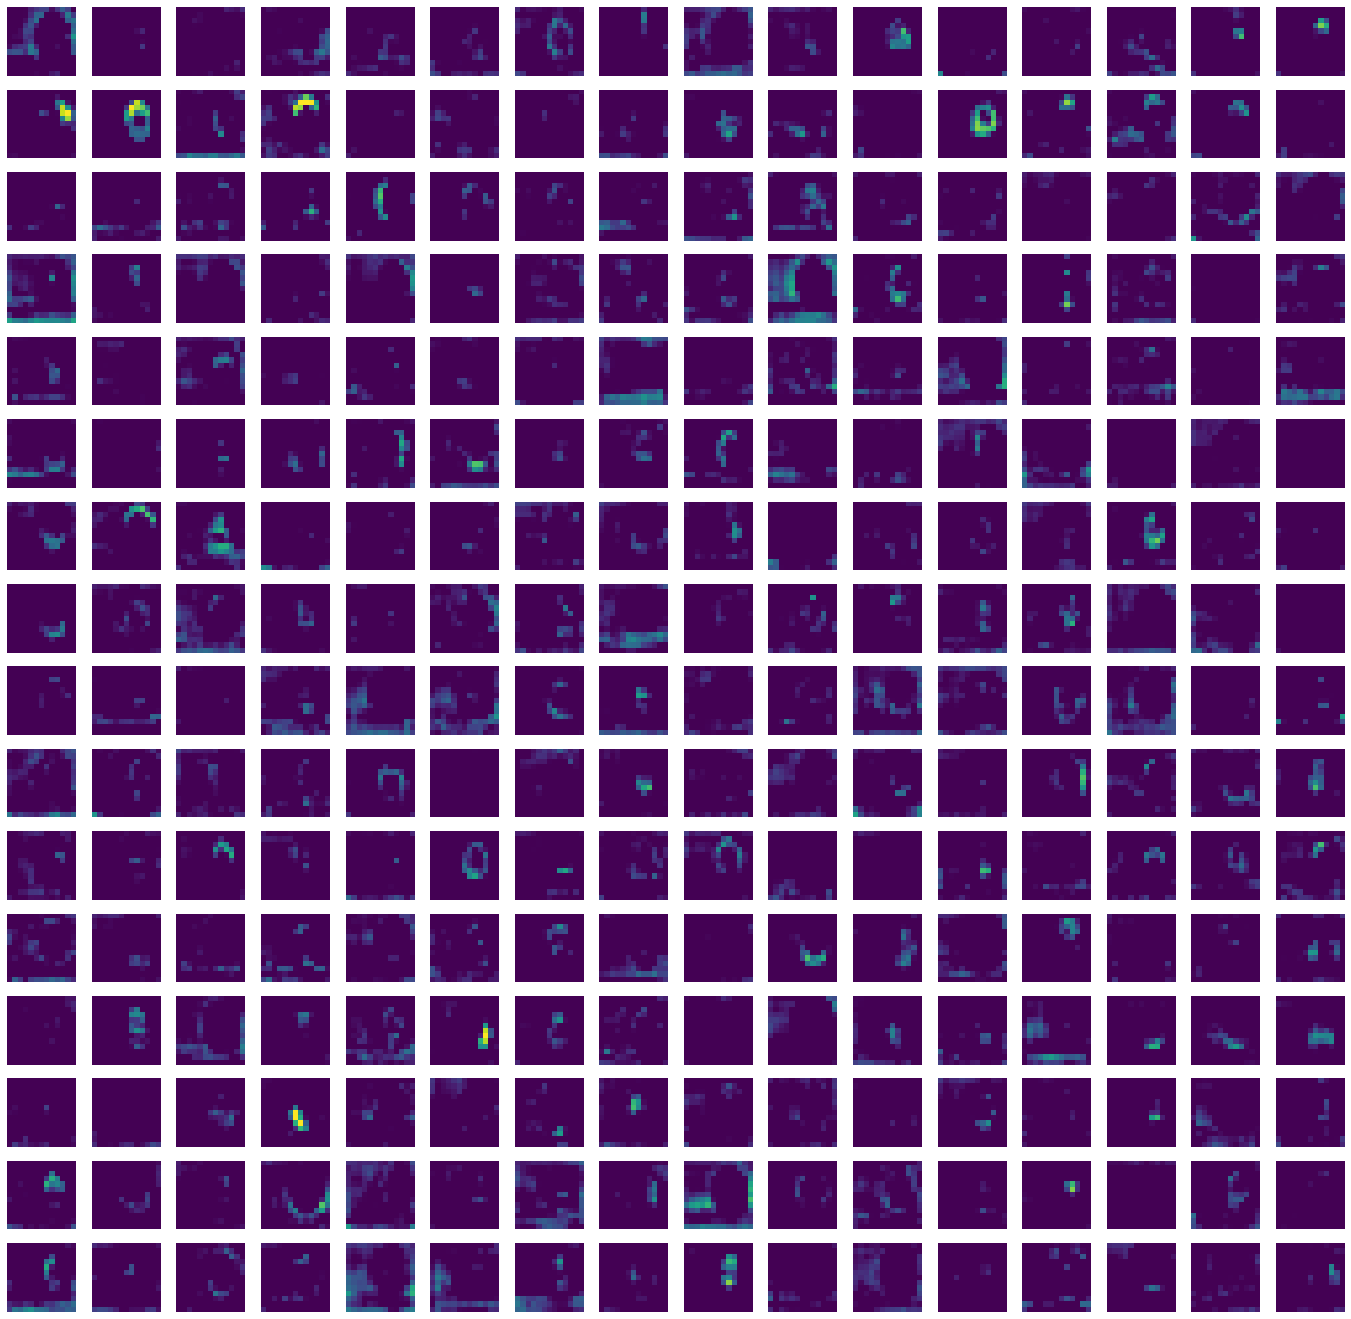

In [37]:
fig = figure(0, (24, 24))
for i in range(256): #activations.shape[1]):
    fig.add_subplot(16, 16, i+1)
    feature_map = activations[0, i, :, :].detach().numpy()
    imshow(feature_map, vmin = 0, vmax = 20); axis('off');

- And finally after the 5th convolution:

In [38]:
with torch.no_grad():
    activations = alexnet.features(im_tensor[None]) #Pass image through first layer
activations.shape

torch.Size([1, 256, 6, 6])

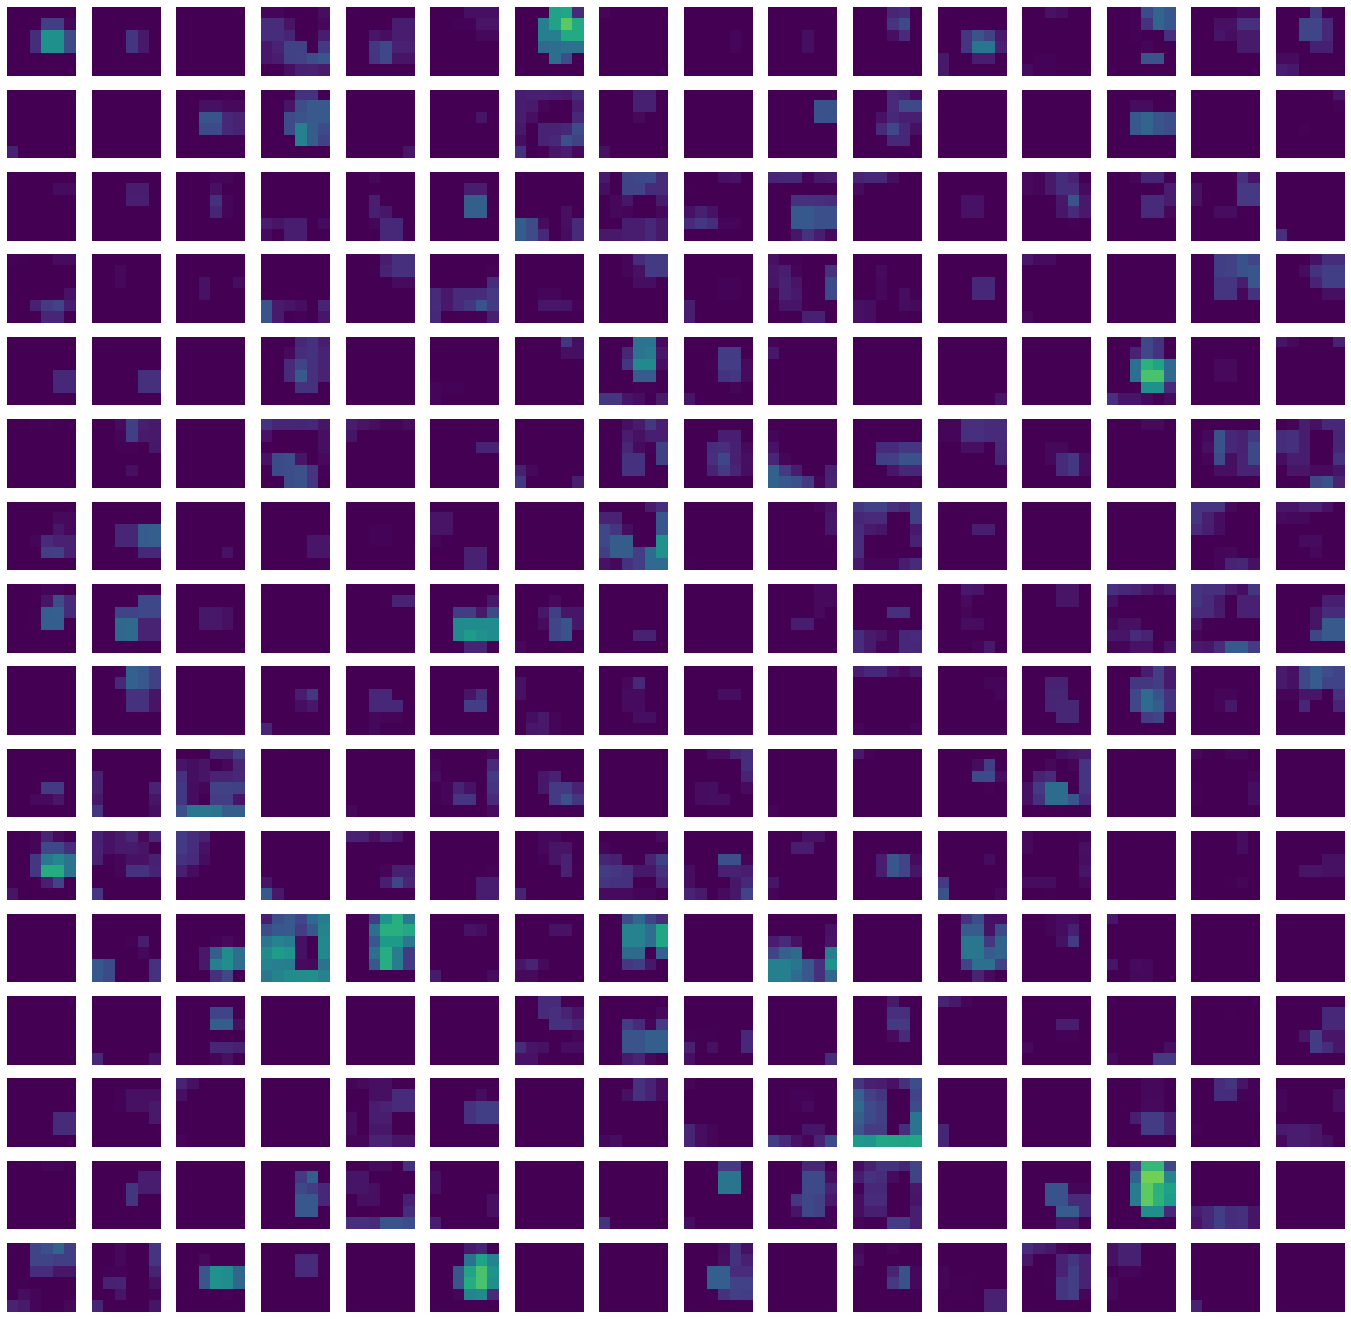

In [39]:
fig = figure(0, (24, 24))
for i in range(256): #activations.shape[1]):
    fig.add_subplot(16, 16, i+1)
    feature_map = activations[0, i, :, :].detach().numpy()
    imshow(feature_map, vmin = 0, vmax = 20); axis('off');

- Note that are activations become more sparse the deeper we go into our network.
- There's some really cool papers/tools/research that use visualization like these to gain insight into what exactly these layers are computing. 
- Interestingly, some of these deeper layers learn recognizable concepts, such as faces!

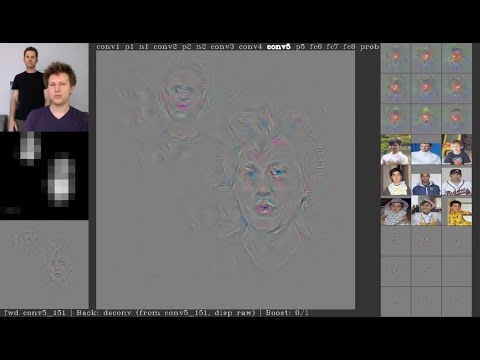

In [40]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('AgkfIQ4IGaM', width = 960, height = 540)

### 2.5 Adaptive Pooling
---

- So, we hopefully have a sense for how what the convolutional layers of alexnet are doing. 
- After passing through the final convolutional layer, we're left with a tensor of dimension (1x256x6x6):

In [81]:
with torch.no_grad():
    activations = alexnet.features(im_tensor[None]) #Pass image through first layer
activations.shape

torch.Size([1, 256, 6, 6])

- Note that after the convolutional layers in AlexNet, the pretrianed pytorch version includes a layer that was not part of the original architecture: `AdaptiveAvgPool2d(output_size=(6, 6))`. 
- Adaptive Average Pooling is a really convenient layer to have - unlike `nn.MaxPool2d`, where we pass in the strid and padding of our pooling filter, `nn.AdaptiveAvgPool2d` allows us to pass in the **dimension of the tensor we want out**. 
- So regardless of the dimension of the tensor that is passed in to `AdaptiveAvgPool2d(output_size=(6, 6))`, the output will be of size (batch_size, color_channels, 6, 6). 
- You may have noticed that our output here is *already* 6x6, so the `AdaptiveAvgPool2d` doesn't actually do anything. 
- The reason it's here it to allow us to pass in input images different from those the network was trained on. 
- If we change our input image size, the output of the final convolutional layer will change accordingly, and if we don't do adaptive average pooling at the end, we'll end up with tensors of different size.
- This is problematic when our unrolled tensor meets our first linear (also known as fully connected) layer, because the input dimension is hard coded to 9216. 
- In short, adaptive average pooling allows us to change input image size without breaking our CNN!

In [43]:
activations_pooled = alexnet.avgpool(activations)

In [46]:
(activations_pooled - activations).abs().sum() #No change!

tensor(0.)

In [47]:
activations_pooled.shape

torch.Size([1, 256, 6, 6])

- Now, before we can pass our tensor into our linear layers, we need to reshape or "unravel" it.
- We can do this using the torch `view` method.

In [51]:
activations_pooled = activations_pooled.view(-1, 256*6*6)
activations_pooled.shape

torch.Size([1, 9216])

In [55]:
alexnet.classifier

Sequential(
  (0): Dropout(p=0.5)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace)
  (3): Dropout(p=0.5)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

### 2.5 Dropout
---

- Now, before we pass our tensor through our linear layers, notice that our tensorf will first go through `Dropout(p=0.5)`. 
- This is another key innovation from the AlexNet paper, and is a very simple and effective way to reduce overfitting. 

![](../graphics/dropout-01.png)

In [74]:
activations_dropout = nn.Dropout(0.5)(activations_pooled)
print(activations_pooled[0, :25])
print(activations_dropout[0, :25])

tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  3.6118,  3.6118,  0.4197,  0.0000,  0.0000,  2.6425, 10.0655,
        10.0655,  4.5981,  0.0000,  0.0000,  2.6425, 10.0655, 10.0655,  4.5981,
         0.0000])
tensor([ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,
         0.0000,  0.0000,  7.2237,  0.0000,  0.0000,  0.0000,  5.2849,  0.0000,
        20.1311,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  9.1962,
         0.0000])


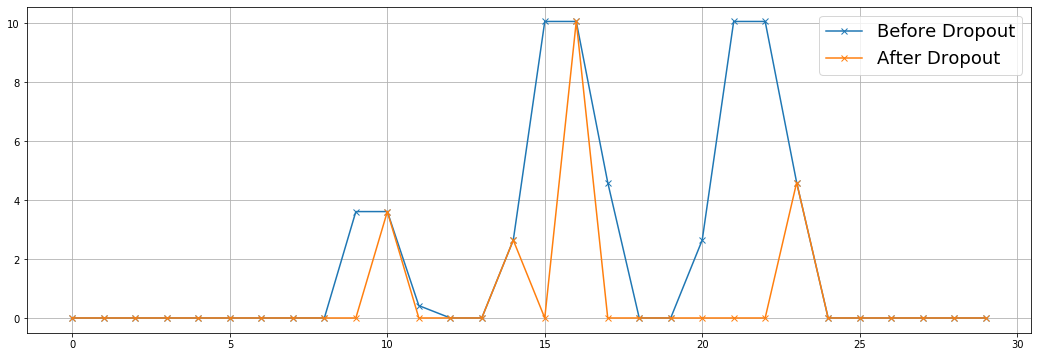

In [84]:
fig = figure(0, (18, 6))
plot(activations_pooled[0, :30].detach().numpy().ravel(), marker = 'x')
plot(activations_dropout[0, :30].detach().numpy().ravel()/2, marker = 'x'); 
grid(1); legend(['Before Dropout', 'After Dropout'], fontsize = 18)

- The dropout idea is really simple - we randomly "turn off" neurons. Neurons that are off do not participate in the forward pass or in backpropogation. 
- The idea here is that this forces the network to learn more robust representation that do not rely on other neurons always "being on". 
- Deep Nets are very prone to overfitting, and dropout is a cheap and easy way to reduce this. 
- At test time, dropout is turned off, generally resulting in a nice performance boost - this is one of the reasons we run `model.eval()` before testing out model - this turns off dropout.
- Finally, when dropout is implemented, most libraries will boost the remaining neurons to keep the overall mean output relatively consistent for a given layer. You can see in the plot above I hade to divide the dropped out tensor values by 2 (this is 1/dropout rate) to make the 2 outputs line up.

### 2.6 Fully Connected/Linear Layers
---

In [86]:
alexnet.classifier

Sequential(
  (0): Dropout(p=0.5)
  (1): Linear(in_features=9216, out_features=4096, bias=True)
  (2): ReLU(inplace)
  (3): Dropout(p=0.5)
  (4): Linear(in_features=4096, out_features=4096, bias=True)
  (5): ReLU(inplace)
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

- All that's left now is to pass our tensor through the 3 linear/fully connected layers at the end of alexnet. 
- In the time since the AlexNet publication, fully connected layers like this have fallen out of favor for computer vision problems - it turns out we can mostly get away wiht just convolutional layers!
- Note that most of our weights are in the convolutional layers. 
- What exactly these layers are doing isn's as easy to make intuitive sense of, relative to the convolutional layers. 

In [90]:
w = alexnet.classifier[1].weight
w.shape

torch.Size([4096, 9216])

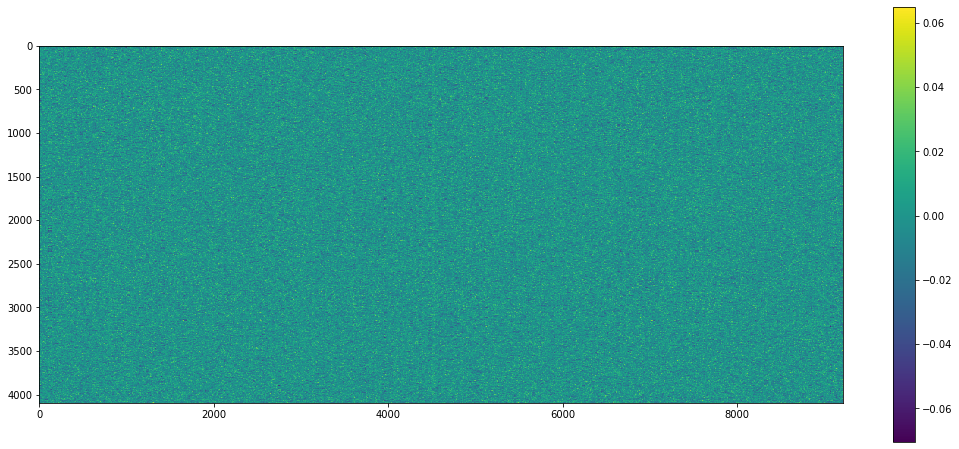

In [92]:
fig = figure(0, (18, 8))
imshow(w.detach()); colorbar();

- Here's the first set of fully connected weights, all 37,748,736 of them!
- From this perspective, it's not so obvoius what they're doing. The thing to know for now is that just our unravelled tensor of length 9216 is multiplied by this huge matrix, and the result is passed on to the next  layer. 
- Let's go ahead and pass our pooled and unraveled activations through all our linear layers:

In [94]:
yhat = alexnet.classifier(activations_pooled)

In [95]:
idx2label[torch.argmax(yhat).item()]

'golf ball'

- Alright, we made it all the way through!
- Note that we skipped the softmax step this time. 
- Since softmax is a **monotonic** function of it's inputs, we don't actually need to apply softmax before taking the argmax. 
- Softmax is nice to have when we want probability estimates that nicely add to one, and can give us more interpretable results. 

### 2.7 AlexNet Results
---

![](../graphics/alexnet_results-01.png)

### 2.8. Transfer Learning
---

- One particularly exciting thing about the AlexNet results is how adaptable deep models are to other computer vision problems. 
- [Razavian et. al.](https://arxiv.org/pdf/1403.6382.pdf) and [Donahue et. al.](https://arxiv.org/pdf/1310.1531.pdf) show that "off-the-shelf" CNNs plus a simple linear classifier outperform existing state of the art accross many computer vision tasks. 
- Since the AlexNet publication, researchers have found more and more applications that can be solved using a pretrained "CNN Backbone" like alexnet. 

![](../graphics/transfer_learning.png)

![](../graphics/spacer_small.png)

## 3. Data Augmentation
---

- There's one more improtant idea from the AlexNet paper we need to discuss.
- This idea is not unique to this paper, but Geoff Hinton and his collaborators did play a big role in popularizing this technique. 
- Data augmentation is a great way to make our dataset appear larger than it actually is. 
- By implementing **label preserving transforms** on our images such as crops, shifts, and small color changes, we can reduce overfitting. 
- See [Goodfellow 7.4](https://www.deeplearningbook.org/contents/regularization.html) for more details. 

![](../graphics/data_augmentation-01.png)

- Let's have a look at how we can augment our data in Pytorch

In [1]:
import numpy as np
from matplotlib.pyplot import *

In [2]:
import torch
from PIL import Image
im = Image.open('../data_sample/golf_ball.JPEG')

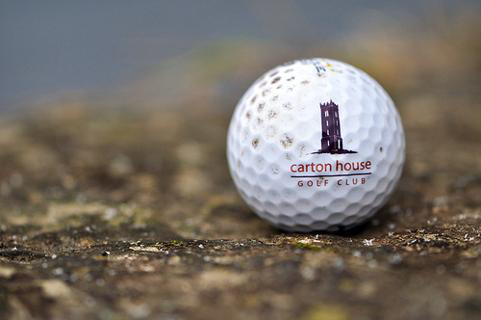

In [3]:
im

In [44]:
from torchvision import transforms
tfms = transforms.Compose([transforms.Resize(256),
                           transforms.RandomRotation(degrees = 5),
                           transforms.RandomCrop((224, 224)), 
                           transforms.RandomHorizontalFlip(), 
                           transforms.ColorJitter(0.1, 0.1, 0.1, 0.1)]) 

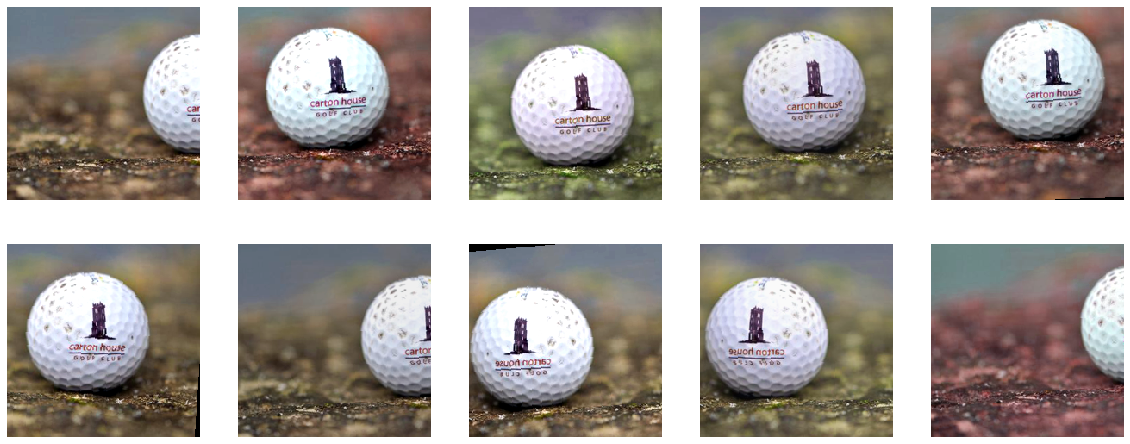

In [48]:
fig = figure(0, (20, 8))
for i in range(10):
    im_aug = tfms(im)
    fig.add_subplot(2, 5, i+1)
    imshow(np.asarray(im_aug)); axis('off')

- Using this transform code, we can perform augmentation at trainig time, effectively making it so that our network never sees exactly the same image twice. 

![](../graphics/spacer_small.png)

## 4. A Little Historical Perspective on the Rise of Deep Learning
---

![](../graphics/lenet_vs_alexnet-01.png)

**References/Assumptions**
- Slide inspired from min 38 of [great talk from Andrej Kerpathy](https://youtu.be/f6ZKaBm3cXU).
- 267 MHz Pentium II single core processor, 1 floating point operation per clock cycle (shoot me an email if you have a better estimate. A couple somewhat relevant sources: [1](https://www.alternatewars.com/BBOW/Computing/Computing_Power.htm) [2](https://projects.ncsu.edu/hpc/Courses/1arch.html)
- GTX 580 GPU FLOPS from [here](https://www.techpowerup.com/gpu-specs/geforce-gtx-580.c270).
- Back of the envelope LeNet math: `5*5*1*28*28*6*2 + 5*5*6*10*10*16*2 + 16*5*5*120*2 + 120*84*2 + 84*2`


**What took so long?**
- As you can see above, remarkably little changed algorithmically between 1998 and 2012. 
- ReLU and dropout are helpful, but not critical for deep learning. 
- And as [Andrej Kerpathy](https://youtu.be/f6ZKaBm3cXU) points out, these two changes both just involve setting something to zero! :)
- In fact you could argue that, **everything we needed for deep learning was in place and known in 1998!**
- Goodfellow has some interesting things to say about this: 


>"At this point [2006], deep networks were generally believed to be very diﬃcult to train. We now know that algorithms that have existed since the 1980s work quitewell, but this was not apparent circa 2006. The issue is perhaps simply that these algorithms were too computationally costly to allow much experimentation withthe hardware available at the time."*
- Deep Learning, Ian Goodfellow, Section 1.2.1

>"Convolutional nets were some of the ﬁrst working deep networks trained with back-propagation. It is not entirely clear why convolutional networks succeeded when general back-propagation networks were considered to have failed. It may simply be that convolutional networks were more computationally eﬃcient than fully connected networks, so it was easier to run multiple experiments with them and tune their implementation and hyperparameters. Larger networks also seem to be easier to train. With modern hardware, large fully connected networks appear to perform reasonably on many tasks, even when using datasets that were available and activation functions that were popular during the times when fully connected networks were believed not to work well. It may be that the primary barriers to the success of neural networks were psychological (practitioners did not expect neural networks to work, so they did not make a serious eﬀort to use neural networks). Whatever the case, it is fortunate that convolutional networksperformed well decades ago. In many ways, they carried the torch for the rest ofdeep learning and paved the way to the acceptance of neural networks in general." 
- Deep Learning, Ian Goodfellow, Section 9.11